In [15]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [16]:
df_clientes = pd.read_csv("../data/processados/clientes.csv")

In [17]:
df_clientes.columns

Index(['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento',
       'PerfilInvestidor', 'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos',
       'ScoreSituacaoFinanceira', 'ScoreRisco', 'P_investidor',
       'b_renda_mensal', 'b_idade', 'tempo_dinheiro_inves', 'resgate_dia',
       'inves_renda_mensal', 'possivel_renda_investida_mes'],
      dtype='object')

In [18]:
df_ml = df_clientes[['P_investidor', 'b_renda_mensal','Id',
                    'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal']]

In [19]:
df_ml.head()

,P_investidor,b_renda_mensal,Id,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal
0,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,1_ano,30,10
1,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,inder,0,20
2,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeS5Fvu8ovGET5gJm4i...,inder,100,10
3,moderado,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeSjLIwE1Kdi6le.fXF...,1_a_5_anos,0,50
4,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeOdVxMPQWM4mWXxiPz...,1_a_5_anos,50,10


In [20]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_ml.isnull().sum()

P_investidor            0
b_renda_mensal          0
Id                      0
tempo_dinheiro_inves    0
resgate_dia             0
inves_renda_mensal      0
dtype: int64

In [46]:
df_ml

,P_investidor,b_renda_mensal,Id,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal
0,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,1_ano,30,10
1,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,inder,0,20
2,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeS5Fvu8ovGET5gJm4i...,inder,100,10
3,moderado,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeSjLIwE1Kdi6le.fXF...,1_a_5_anos,0,50
4,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeOdVxMPQWM4mWXxiPz...,1_a_5_anos,50,10
...,...,...,...,...,...,...
13404,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeb5uDkvii4bLVXuKwX...,1_a_5_anos,30,10
13405,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPe6RRS6tpBMN18up0hr...,1_a_5_anos,50,30
13406,arrojado,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeGIDWl2J7HBxx2C2LN...,inder,0,75
13407,conservador,"(-50.0, 10000.0]",$2b$10$.DCvvJ9WSDpqVP2xXjeSPeJ/SmDXRVoa03nJIT4...,inder,30,50


In [22]:
cluster_model = ClusterModel(df_ml.loc[:, df_ml.columns != 'Id'],nb_centroids=[10])

In [23]:
cluster_model.get_pca_ratio()

array([0.21440631, 0.13060729, 0.1069511 , 0.09455316, 0.08366256,
       0.07442331, 0.07229979, 0.07186112, 0.06459934, 0.05186525])

In [24]:
cluster_model.get_pca_values()

array([[-1.69900997, -0.66592575,  0.84846086, ..., -0.09442262,
         0.27561528, -0.36419227],
       [-1.31517166,  0.99378868,  0.0067669 , ..., -0.01771042,
        -0.24492231, -1.45429348],
       [-2.37058683,  0.62567214,  0.76455885, ...,  0.23788936,
        -0.2377324 ,  1.11625808],
       ...,
       [ 1.0113785 ,  4.08526912, -0.98068526, ..., -0.57373162,
         1.35601456,  0.04400593],
       [-1.24965434,  1.63204792, -0.0244017 , ..., -0.06719903,
         0.31337937, -0.13461744],
       [ 2.23136829,  3.6532958 , -1.05310904, ..., -0.31117126,
        -0.8675143 ,  1.00917653]])

In [25]:
clusters, model = cluster_model.kmeans_cluster()

In [43]:
pickle.dump(model, open(f'../models/kmeans_clientes_{dt.datetime.now()}.pkl','wb'))

In [27]:
clusters[0].head()

,P_investidor,b_renda_mensal,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal,cluster
0,conservador,"(-50.0, 10000.0]",1_ano,30,10,6
1,conservador,"(-50.0, 10000.0]",inder,0,20,5
2,conservador,"(-50.0, 10000.0]",inder,100,10,5
3,moderado,"(-50.0, 10000.0]",1_a_5_anos,0,50,1
4,conservador,"(-50.0, 10000.0]",1_a_5_anos,50,10,0


In [28]:
# clusters[0].to_csv("data/processaods")

In [29]:
cluster = clusters[0]

In [30]:
cluster.shape

(13331, 6)

In [31]:
df_merged = cluster.merge(df_ml[['Id']], left_index=True, right_index=True)

In [32]:
df_merged.to_csv("../data/processados/clientes_final.csv", index=False)

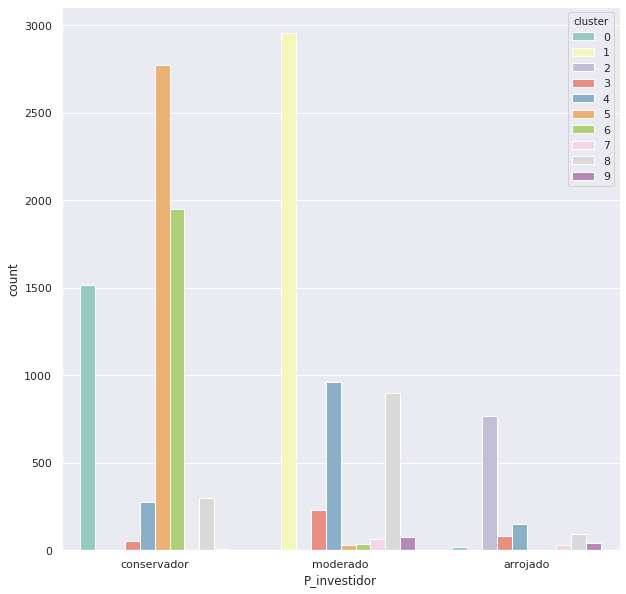

In [33]:
plt.figure(figsize=(10,10))
sns.countplot("P_investidor", hue="cluster", data=cluster)
plt.savefig("p1")

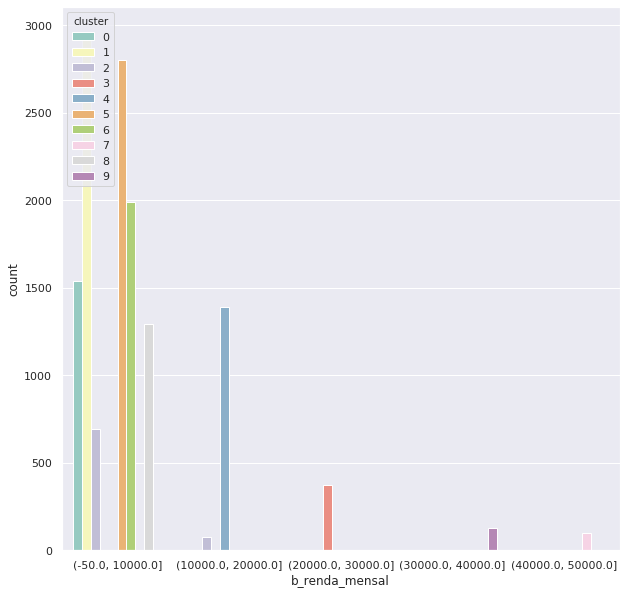

In [34]:
plt.figure(figsize=(10,10))
sns.countplot("b_renda_mensal", hue="cluster", data=cluster)
plt.savefig("p2")

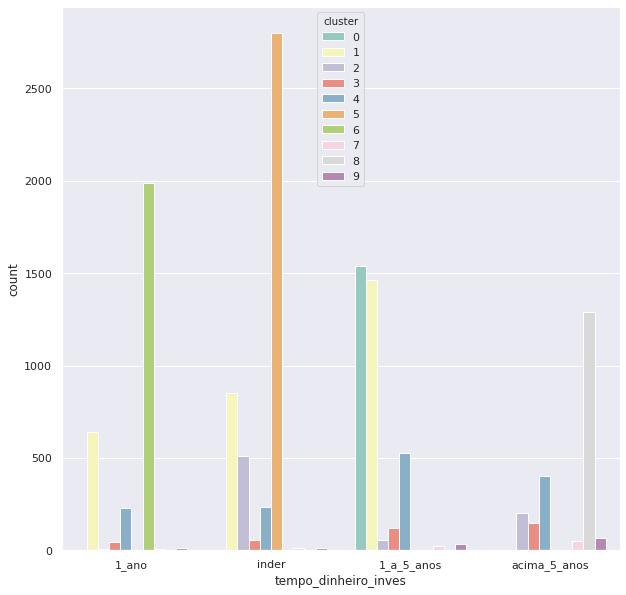

In [35]:
plt.figure(figsize=(10,10))
sns.countplot("tempo_dinheiro_inves", hue="cluster", data=cluster)
plt.savefig("p3")

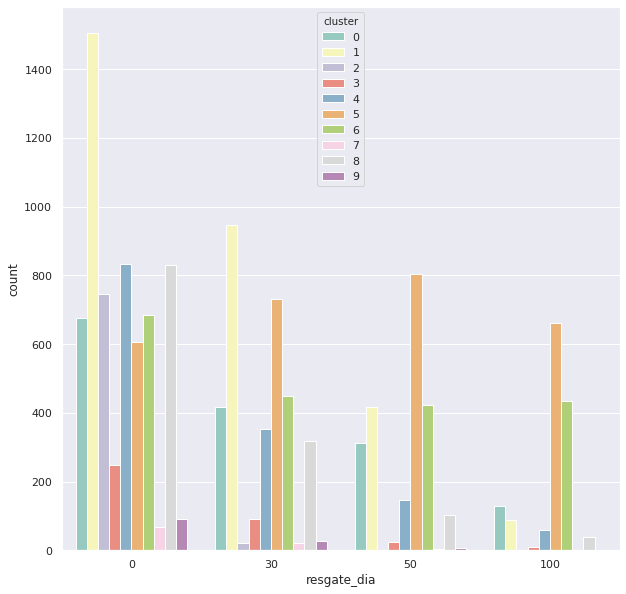

In [36]:
plt.figure(figsize=(10,10))
sns.countplot("resgate_dia", hue="cluster", data=cluster)

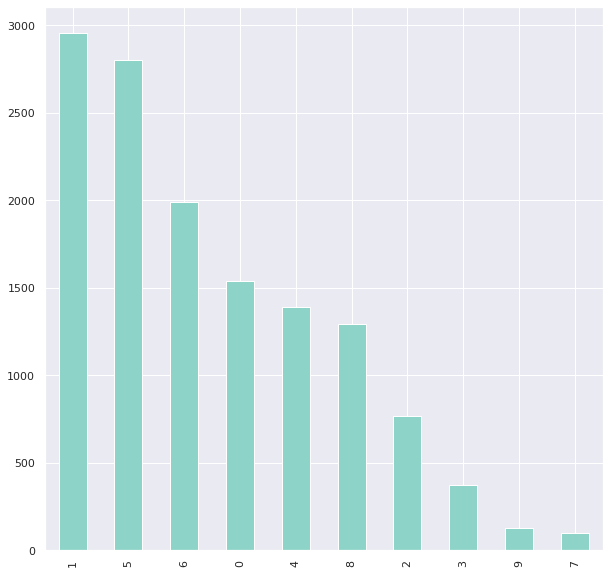

In [37]:
clust = clusters[0]
plt.figure(figsize=(10,10))
clust['cluster'].value_counts().plot(kind='bar')

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


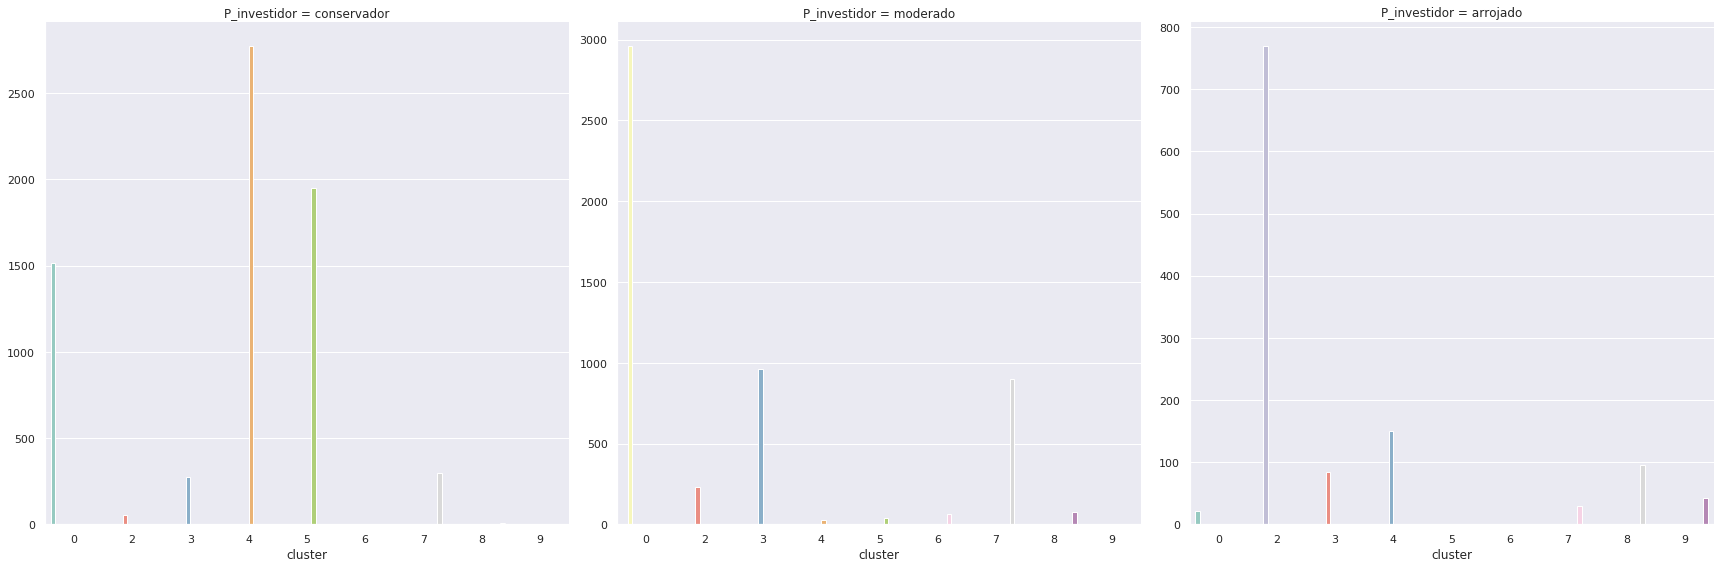

In [38]:
g = sns.FacetGrid(clust, col="P_investidor", height=8, sharey=False, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)

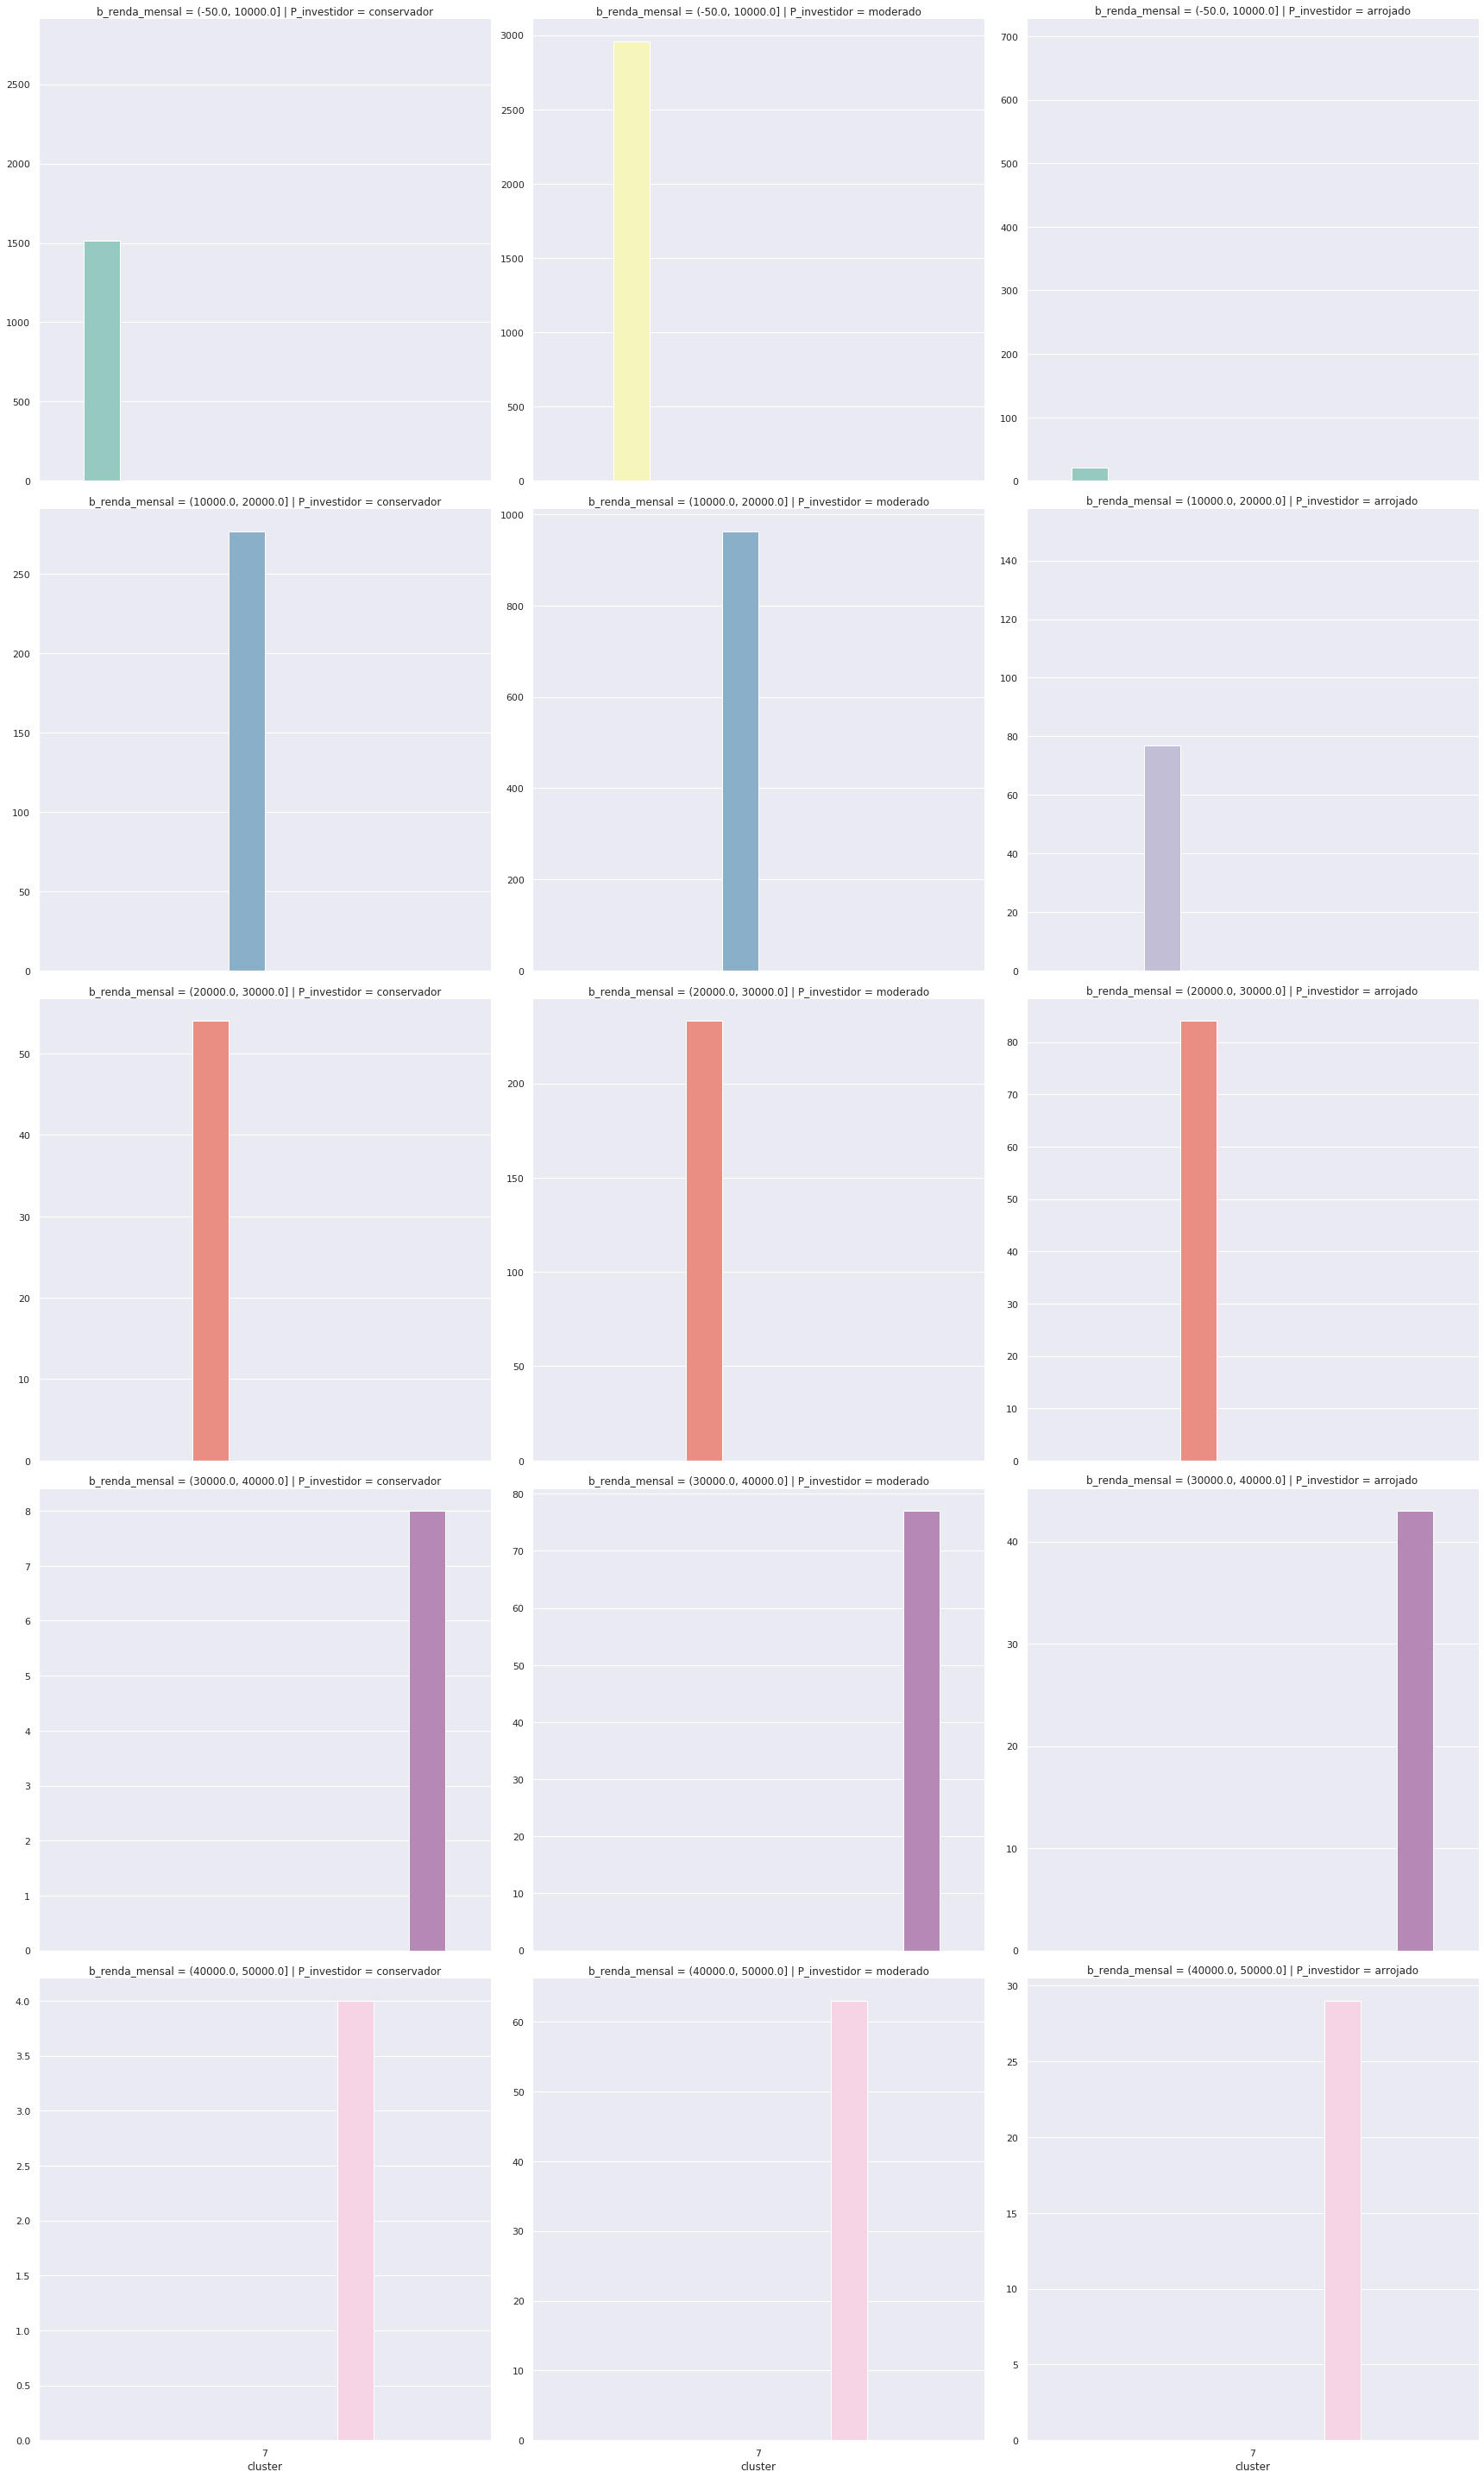

In [39]:
g = sns.FacetGrid(clust, col="P_investidor", row='b_renda_mensal', height=8, sharey=False, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)

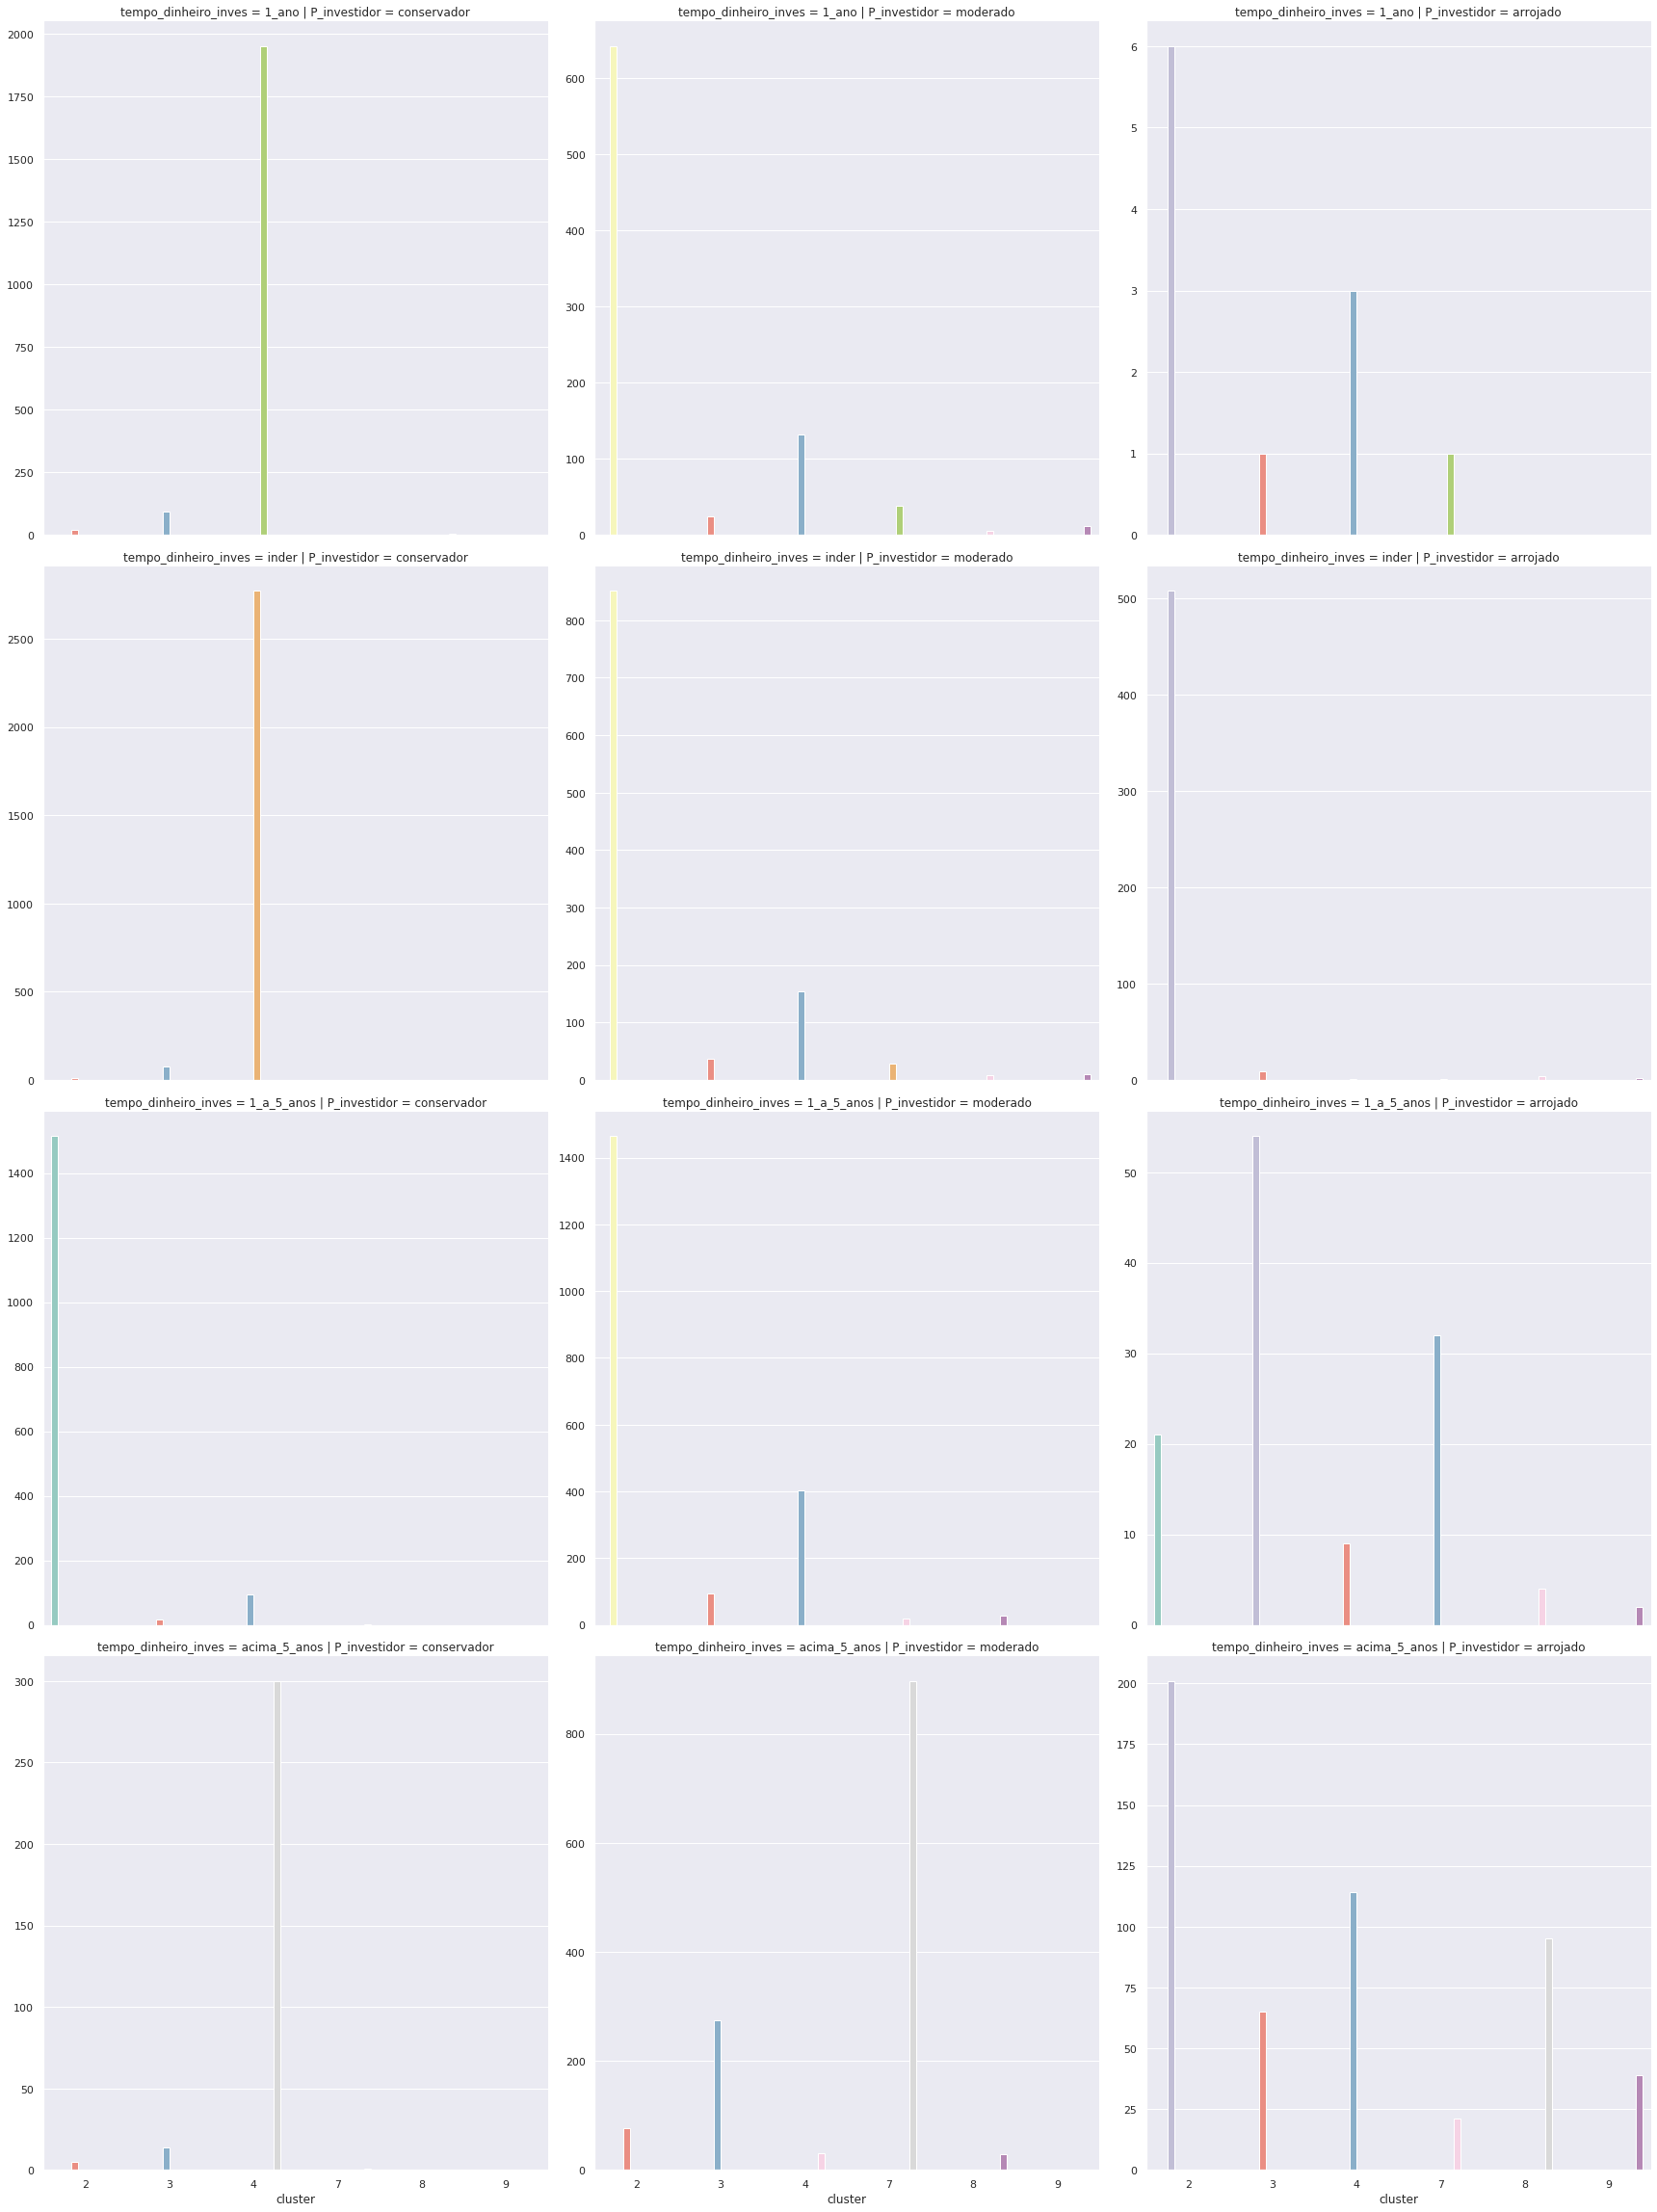

In [40]:
g = sns.FacetGrid(clust, col="P_investidor", row='tempo_dinheiro_inves', height=8, sharey=False, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)

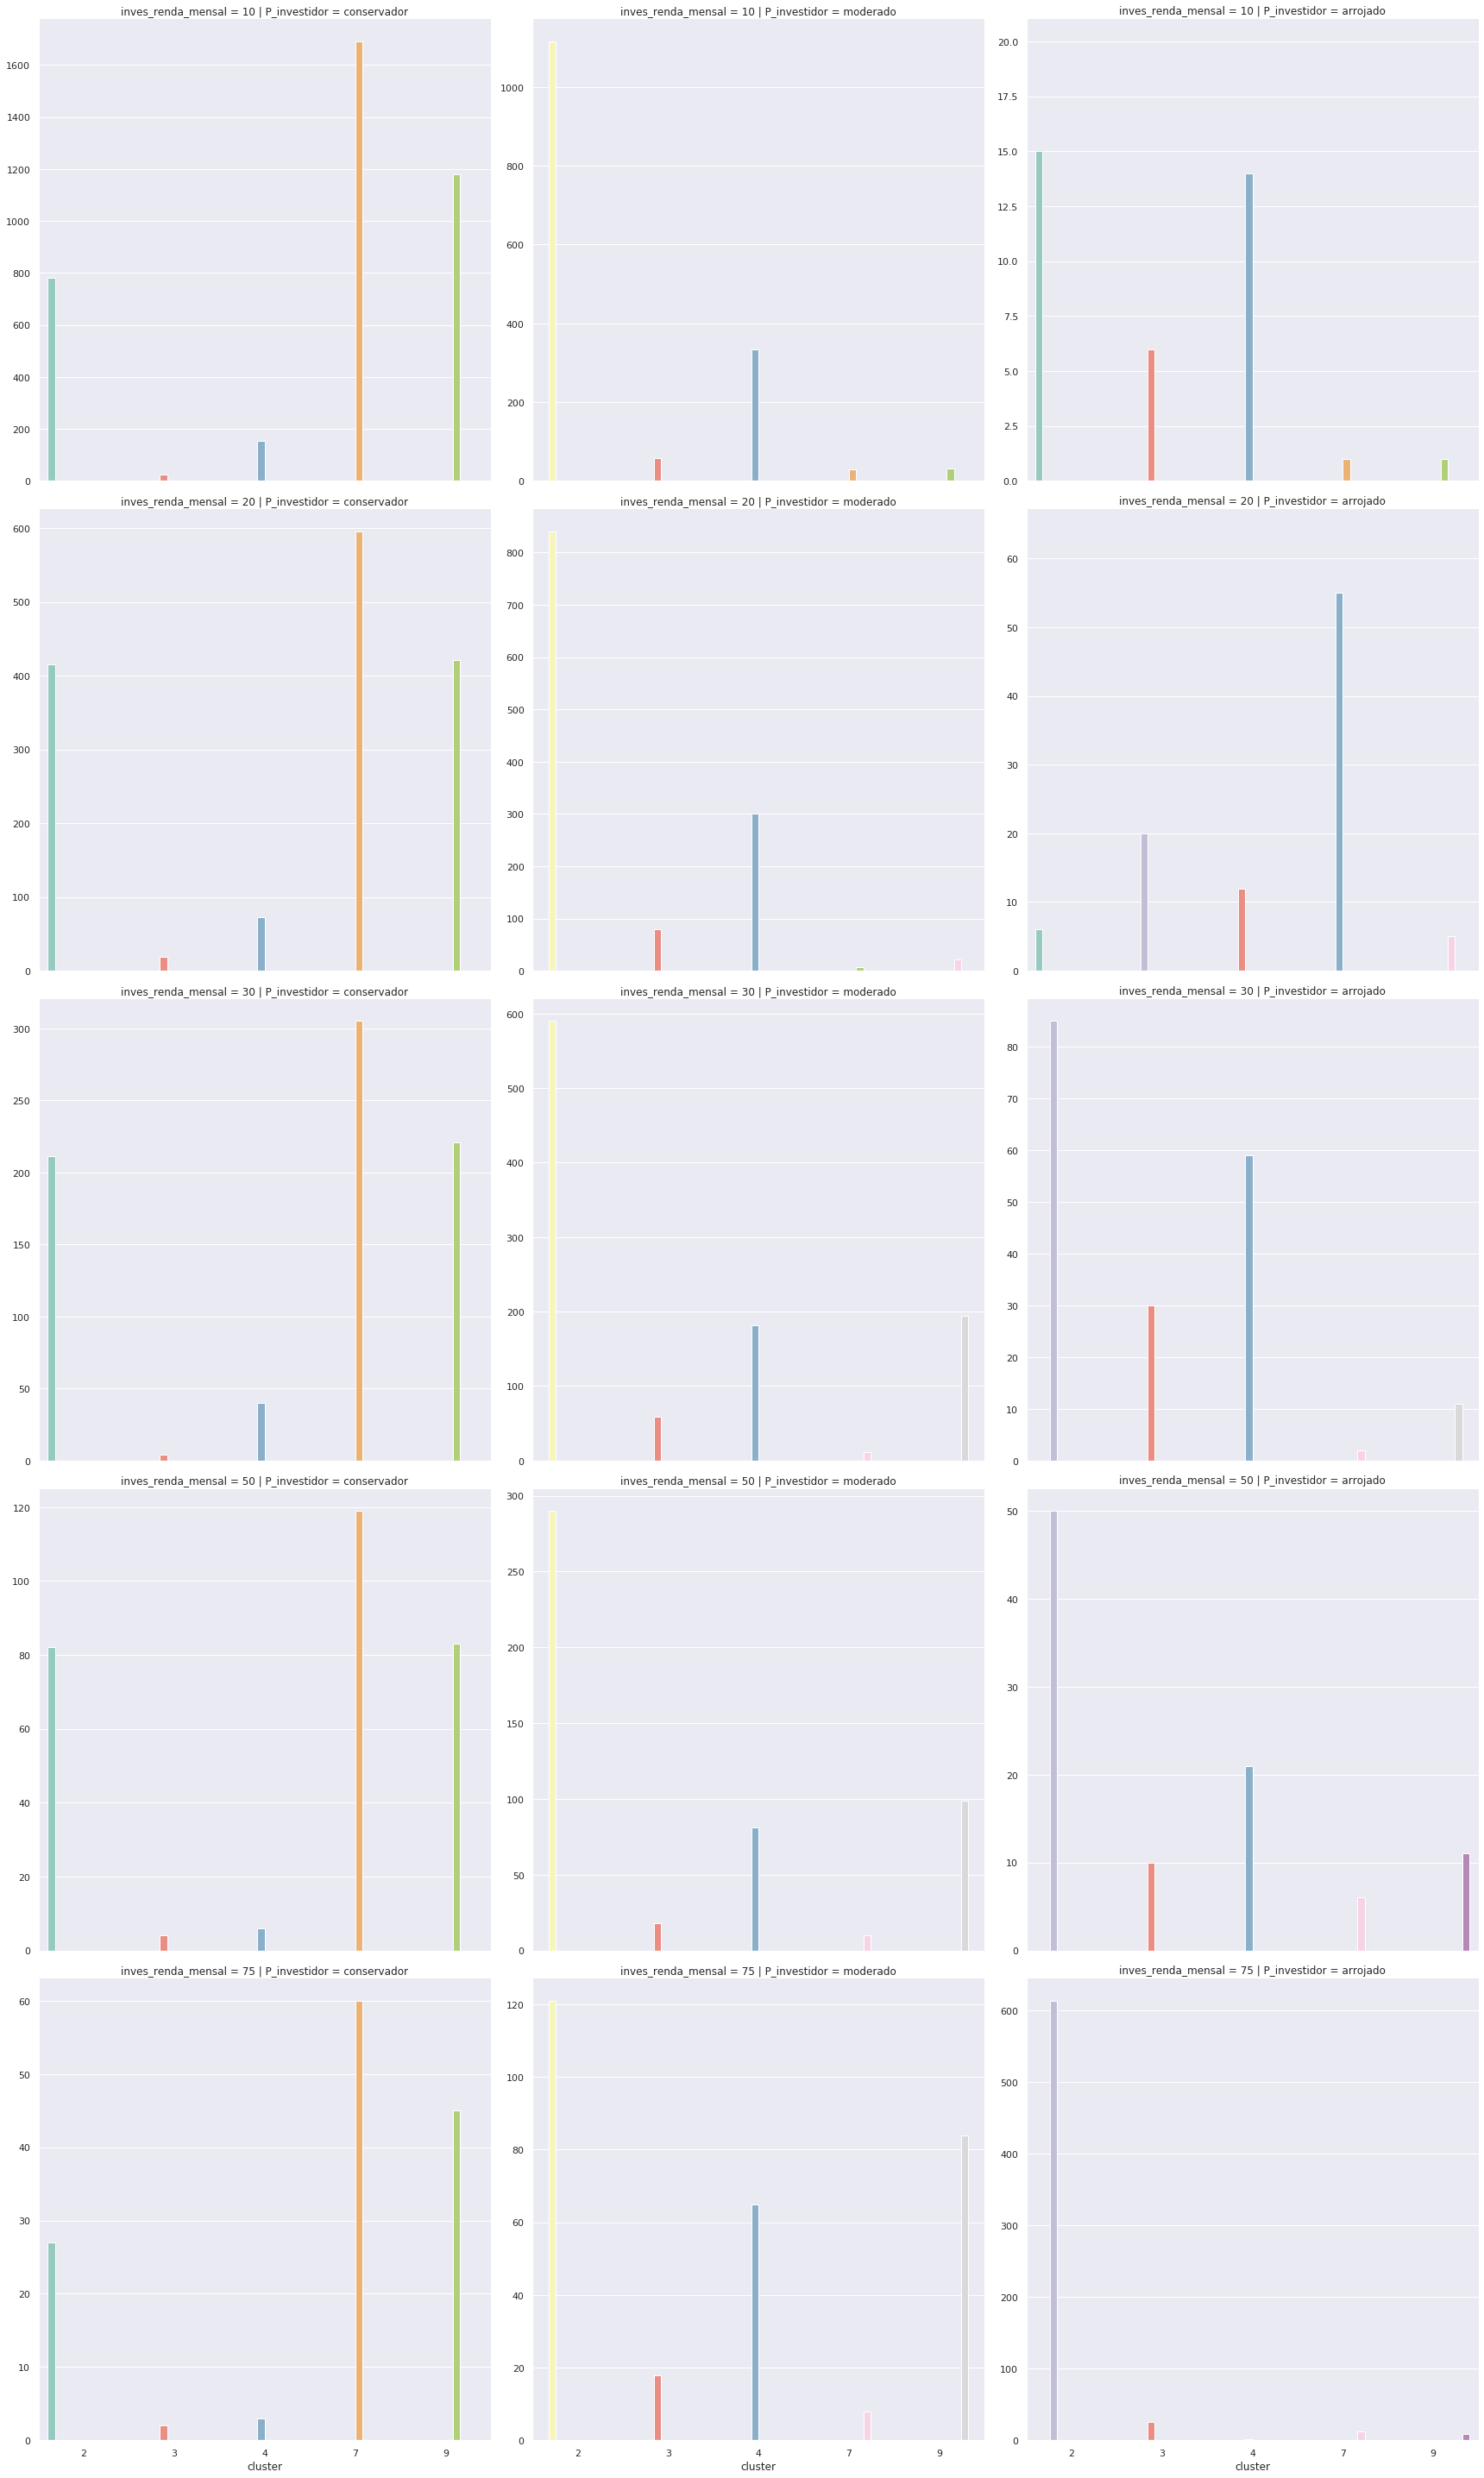

In [41]:
g = sns.FacetGrid(clust, col="P_investidor", row='inves_renda_mensal', sharey=False, height=8, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)


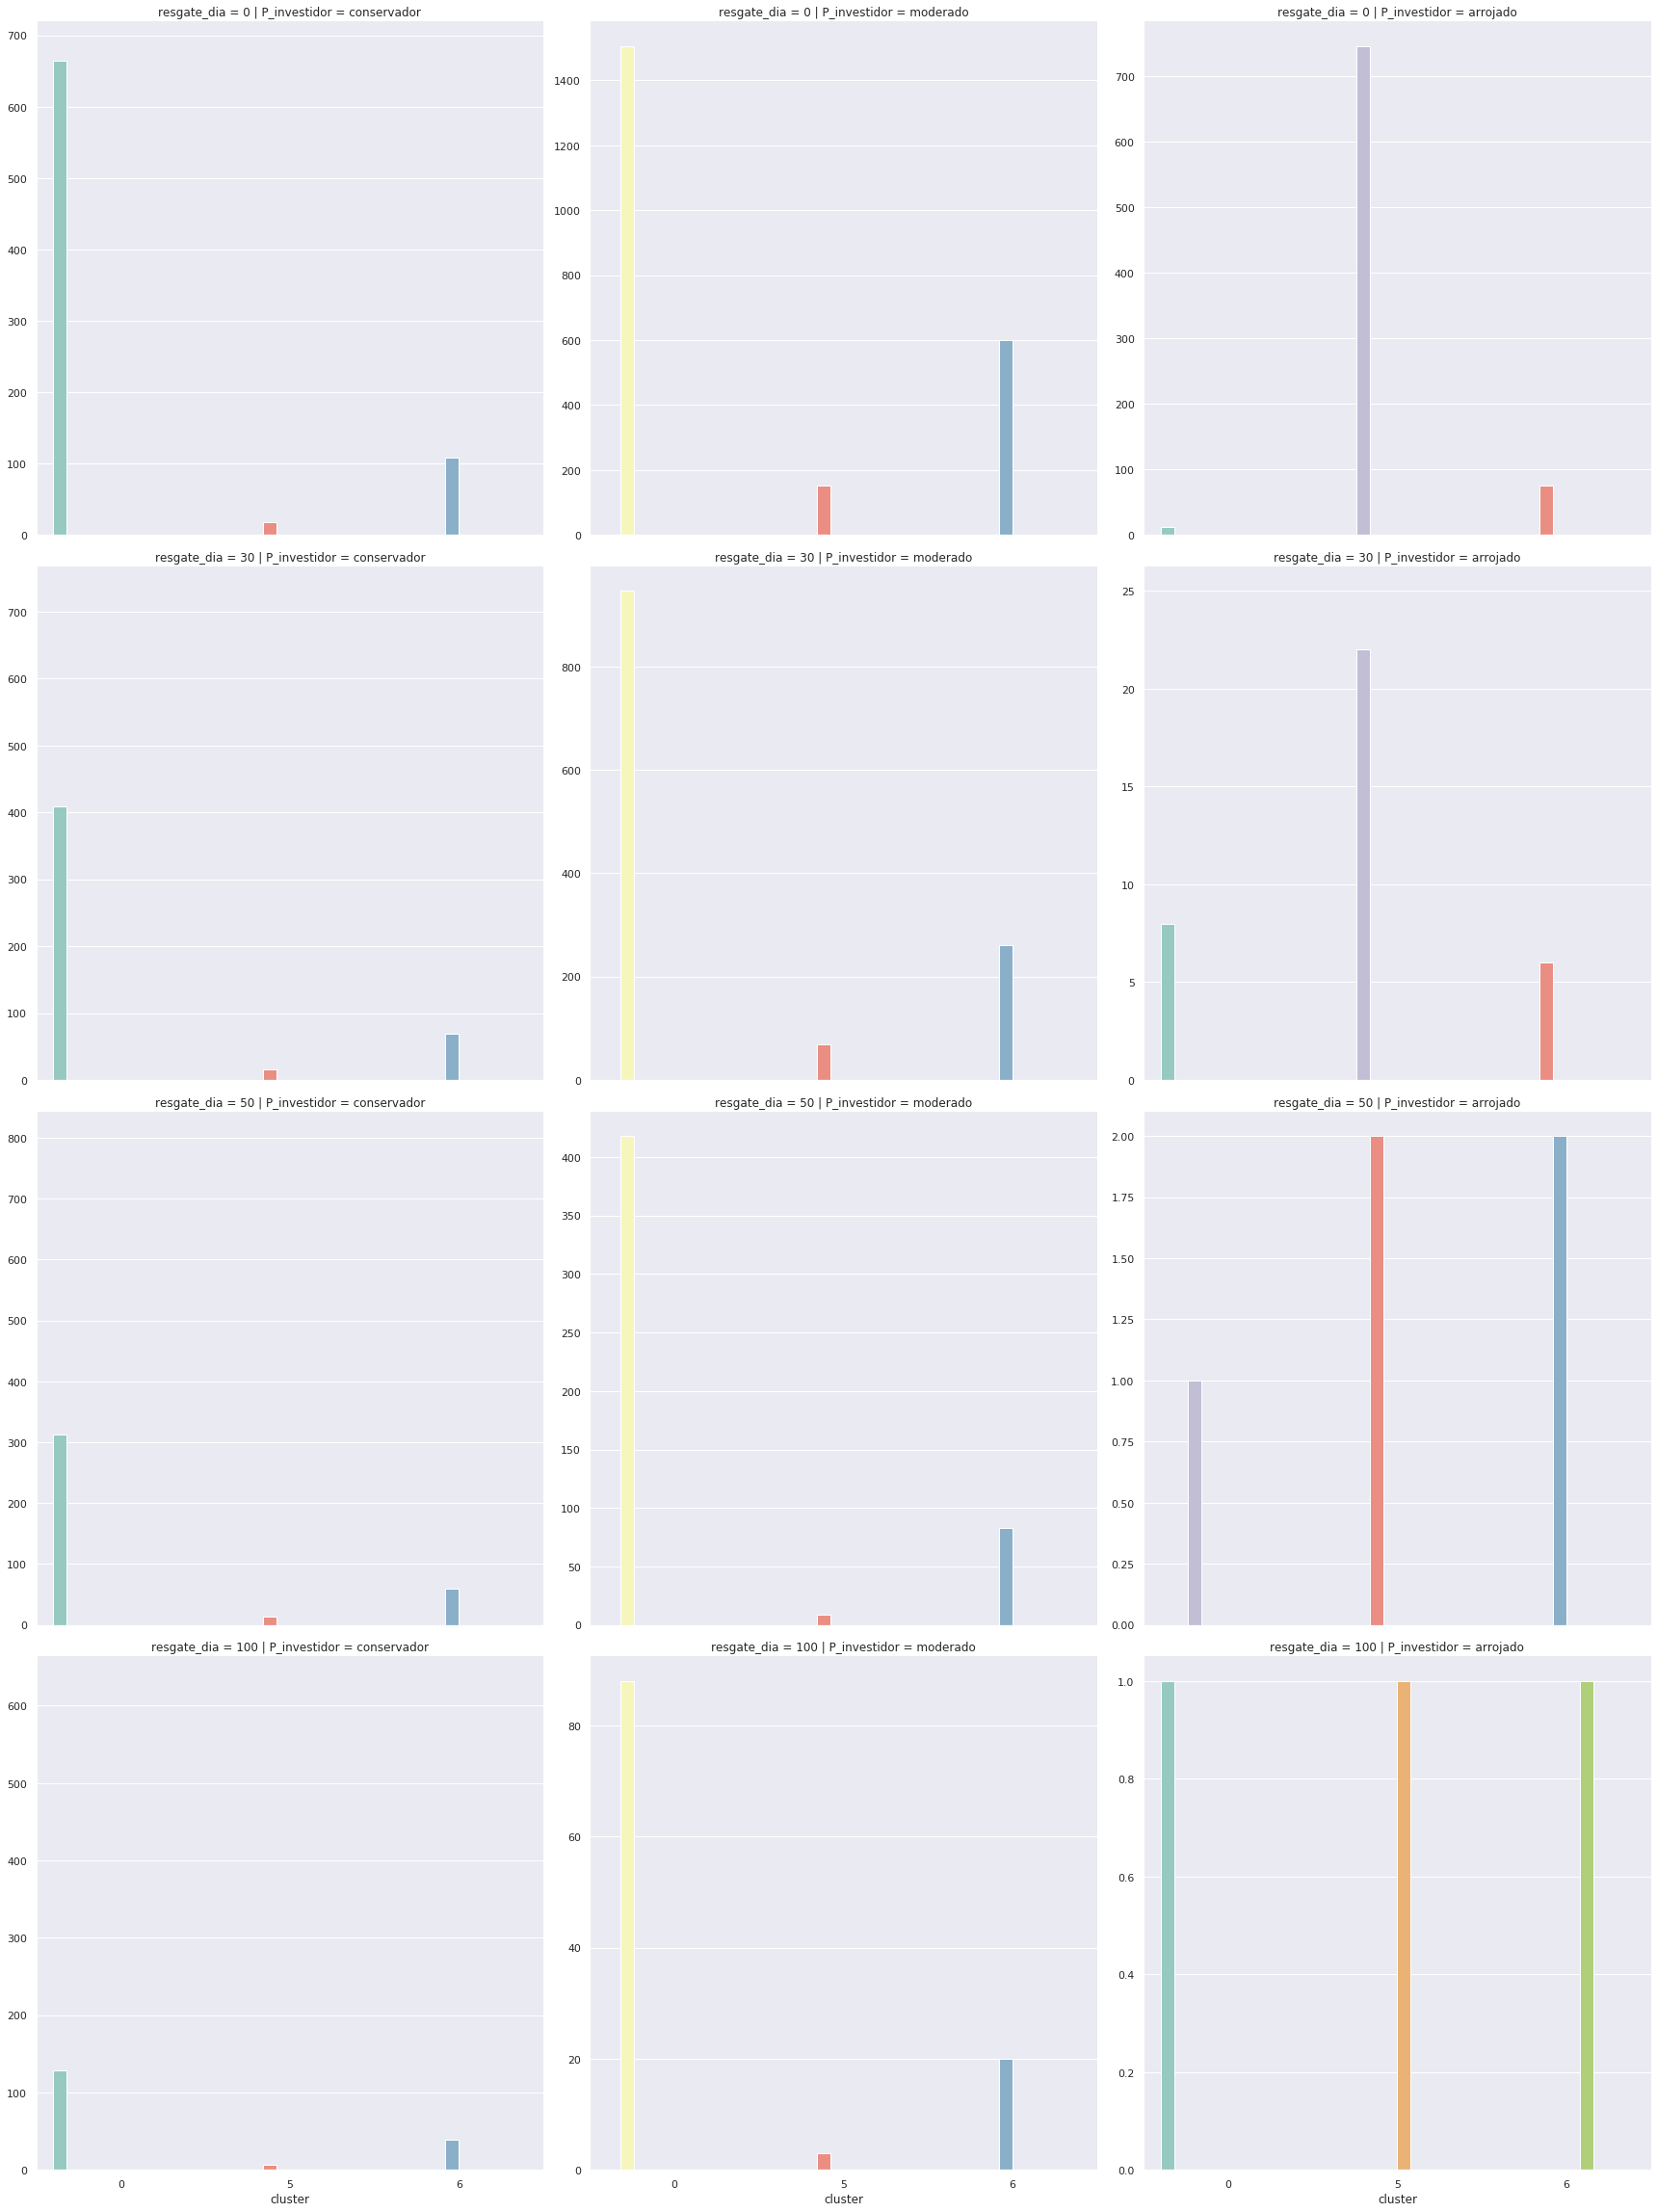

In [42]:
g = sns.FacetGrid(clust, col="P_investidor", row='resgate_dia', sharey=False, height=8, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)
